In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
import os
%load_ext tensorboard

In [3]:
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4, 10]))

dataset2 = tf.data.Dataset.from_tensor_slices(
   (tf.random.uniform([4]),
    tf.random.uniform([4, 100], maxval=100, dtype=tf.int32)))

In [4]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))

dataset3.element_spec

(TensorSpec(shape=(10,), dtype=tf.float32, name=None),
 (TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(100,), dtype=tf.int32, name=None)))

In [5]:
rand_tens = tf.random.uniform([5,10])

set1 = tf.data.Dataset.from_tensor_slices([rand_tens, rand_tens])
set2 = tf.data.Dataset.from_tensors([rand_tens, rand_tens])

set1.element_spec, set2.element_spec

for datum in set1:
    print(datum)

tf.Tensor(
[[0.05693495 0.20423281 0.995083   0.7128415  0.21193206 0.55795336
  0.55311847 0.73030686 0.42507088 0.7609886 ]
 [0.25519955 0.10509217 0.92264843 0.62416065 0.37677372 0.18240142
  0.39500153 0.27138138 0.6924279  0.9751072 ]
 [0.48577404 0.9441446  0.86128044 0.7409383  0.68137074 0.8300483
  0.9630034  0.3007419  0.110291   0.21041977]
 [0.43164456 0.11456966 0.04403174 0.42425823 0.40204155 0.1322602
  0.03125918 0.769758   0.54214776 0.737625  ]
 [0.17302    0.43833315 0.65474427 0.7370416  0.94504476 0.2557448
  0.43044627 0.22821534 0.9563619  0.44809306]], shape=(5, 10), dtype=float32)
tf.Tensor(
[[0.05693495 0.20423281 0.995083   0.7128415  0.21193206 0.55795336
  0.55311847 0.73030686 0.42507088 0.7609886 ]
 [0.25519955 0.10509217 0.92264843 0.62416065 0.37677372 0.18240142
  0.39500153 0.27138138 0.6924279  0.9751072 ]
 [0.48577404 0.9441446  0.86128044 0.7409383  0.68137074 0.8300483
  0.9630034  0.3007419  0.110291   0.21041977]
 [0.43164456 0.11456966 0.0440

In [7]:

for datum in set2:
    print(datum)

tf.Tensor(
[[[0.05693495 0.20423281 0.995083   0.7128415  0.21193206 0.55795336
   0.55311847 0.73030686 0.42507088 0.7609886 ]
  [0.25519955 0.10509217 0.92264843 0.62416065 0.37677372 0.18240142
   0.39500153 0.27138138 0.6924279  0.9751072 ]
  [0.48577404 0.9441446  0.86128044 0.7409383  0.68137074 0.8300483
   0.9630034  0.3007419  0.110291   0.21041977]
  [0.43164456 0.11456966 0.04403174 0.42425823 0.40204155 0.1322602
   0.03125918 0.769758   0.54214776 0.737625  ]
  [0.17302    0.43833315 0.65474427 0.7370416  0.94504476 0.2557448
   0.43044627 0.22821534 0.9563619  0.44809306]]

 [[0.05693495 0.20423281 0.995083   0.7128415  0.21193206 0.55795336
   0.55311847 0.73030686 0.42507088 0.7609886 ]
  [0.25519955 0.10509217 0.92264843 0.62416065 0.37677372 0.18240142
   0.39500153 0.27138138 0.6924279  0.9751072 ]
  [0.48577404 0.9441446  0.86128044 0.7409383  0.68137074 0.8300483
   0.9630034  0.3007419  0.110291   0.21041977]
  [0.43164456 0.11456966 0.04403174 0.42425823 0.402041

In [8]:
for a, (b,c) in dataset3:
    print(f'shapes: {a.shape = }, {b.shape = }, {c.shape = }')


shapes: a.shape = TensorShape([10]), b.shape = TensorShape([]), c.shape = TensorShape([100])
shapes: a.shape = TensorShape([10]), b.shape = TensorShape([]), c.shape = TensorShape([100])
shapes: a.shape = TensorShape([10]), b.shape = TensorShape([]), c.shape = TensorShape([100])
shapes: a.shape = TensorShape([10]), b.shape = TensorShape([]), c.shape = TensorShape([100])


In [9]:
def fibonacci(f1=0, f2=1):
    yield f1
    yield f2
    while True:
        f3 = f1 + f2
        yield f3
        f1, f2 = f2, f3

gen_exp = fibonacci(2,1)
for num in gen_exp:
    print(num)
    if num > 10000:
        break

print(f"The next one: {next(gen_exp)}")

2
1
3
4
7
11
18
29
47
76
123
199
322
521
843
1364
2207
3571
5778
9349
15127
The next one: 24476


In [12]:
a = np.arange(25).reshape(5,5) + 1
b = (0,1,2,3,4)
a[b,b]

array([ 1,  7, 13, 19, 25])

In [17]:
x = np.array([[1, 2], [3, 4], [5, 6]])
print(x.shape)
print(x)
print(x[[0, 1, 2], [0, 1, 0]])

(3, 2)
[[1 2]
 [3 4]
 [5 6]]
[1 4 5]


In [18]:
x = np.array([[ 0,  1,  2],
              [ 3,  4,  5],
              [ 6,  7,  8],
              [ 9, 10, 11]])

rows = np.array([[0, 0],
                 [3, 3]], dtype=np.intp)
columns = np.array([[0, 2],
                    [0, 2]], dtype=np.intp)
x[rows, columns]

array([[ 0,  2],
       [ 9, 11]])

In [20]:
rows = np.array([0, 3], dtype=np.intp)
columns = np.array([0, 2], dtype=np.intp)
print(rows[:, np.newaxis])
print(x[rows[:, np.newaxis], columns])
print(x[np.ix_(rows, columns)])

[[0]
 [3]]
[[ 0  2]
 [ 9 11]]
[[ 0  2]
 [ 9 11]]


In [33]:
a = np.arange(1,100)
b = a % 2 == 0
~b * b

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [28]:
as_list = [i for i in range(100_000_000)]
as_gen = (i for i in range(100_000_000))



%timeit sum(as_list)
%timeit sum(as_gen)


2.93 s ± 76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 11.00 times longer than the fastest. This could mean that an intermediate result is being cached.
329 ns ± 319 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)


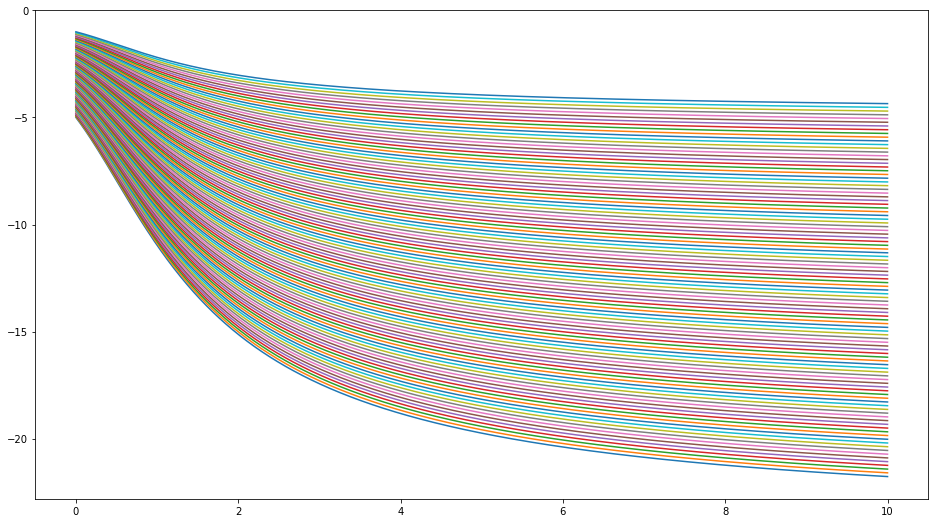

In [148]:
def f(t, x):
    return x/(t*t + 1)

def rk4(func, y0, t0=0, tf=1, n=1000):
    h = (tf-t0)/n
    t = t0
    y = y0
    while t <= tf:
        yield t, y

        k1 = func(t,y)
        k2 = func(t + h*.5, y+h*k1*.5)
        k3 = func(t + h*.5, y+h*k2*.5)
        k4 = func(t + h, y + h*k3)

        y += (k1 + 2*k2 + 2*k3 + k4)*h/6
        t += h

final = 10; n = 1000
fig, ax = plt.subplots(figsize=(16,9))
for blah in np.linspace(-5, -1, 101):
    sol = rk4(f, blah, tf=final, n=n)
    sol = np.array([s for s in sol]).T
    ax.plot(*sol)
    

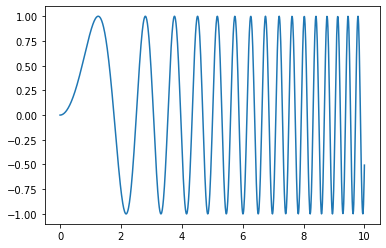

In [149]:
times = np.linspace(0, final, n+1)
plt.plot(times, np.sin(times**2))

In [2]:
class weighted_add(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(weighted_add, self).__init__(**kwargs)
        self.a = tf.Variable(initial_value=tf.random_uniform_initializer(0, 1)(shape=()), trainable=True)
        self.b = tf.Variable(initial_value=1-self.a, trainable=True)

    def call(self, inputs):
        return tf.add(self.a*inputs[0], self.b*inputs[1])

    def __repr__(self):
        a = self.a.numpy(); b = self.b.numpy()
        return f"Layer name: {self.name}\n{a = },\n{b = }"

def functional_model(final_layer):

    input1 = tf.keras.layers.Input(shape=(10,10), name="Input_1")
    input2 = tf.keras.layers.Input(shape=(10,10), name="Input_2")

    dense_layer_1 = tf.keras.layers.Dense(128, activation='swish', name="The_Dense_Layer_1")
    dense_layer_2 = tf.keras.layers.Dense(128, activation='swish', name="The_Dense_Layer_2")

    t_form_layer = tf.keras.layers.Dense(128, activation='relu', name="Transform_Layer")

    y1, y2 = t_form_layer(input1), t_form_layer(input2)

    for i in range(10):
        y2, y1 = dense_layer_1(y1), dense_layer_2(y2)
    
    output_layer = tf.keras.layers.Dense(10, activation='softmax', name='Penultimate_layer')
    out1, out2 = output_layer(y1), output_layer(y2)


    return tf.keras.Model(inputs=[input1, input2], outputs=final_layer((out1,out2)))

laster = weighted_add(name="Last_Layer")
model = functional_model(laster)
model.compile(optimizer='adam', loss='mse')
model.summary()

set1 = tf.data.Dataset.from_tensor_slices(tf.random.normal(shape=(1000, 10, 10), mean=-5, stddev=5))
set2 = tf.data.Dataset.from_tensor_slices(tf.random.uniform(shape=(1000, 10, 10), minval=-5, maxval=5))
inputs = tf.data.Dataset.zip((set1, set2)).shuffle(1000).batch(100)

target = tf.data.Dataset.from_tensor_slices(tf.random.gamma(shape=(1000,10,10), alpha=1, beta=1)).batch(100)

dataset = tf.data.Dataset.zip((inputs, target))
print(dataset.element_spec)

log_dir = os.path.join(os.getcwd(), "logs/fit/test")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=dataset, 
          epochs=5, 
          #validation_data=dataset,
          callbacks=[tensorboard_callback])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
Transform_Layer (Dense)         (None, 10, 128)      1408        Input_1[0][0]                    
                                                                 Input_2[0][0]                    
__________________________________________________________________________________________________
The_Dense_Layer_1 (Dense)       (None, 10, 128)      16512       Transform_Layer[0][0]            
                                                                 The_Dense_Layer_2[0][0]          
                                                                 The_Dense_Layer_2[1][0]      

In [31]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

%tensorboard --logdir logs/fit

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3574 - accuracy: 0.8951 - val_loss: 0.1212 - val_accuracy: 0.9622
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1014 - accuracy: 0.9691 - val_loss: 0.0719 - val_accuracy: 0.9772
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0667 - accuracy: 0.9792 - val_loss: 0.0696 - val_accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0518 - accuracy: 0.9834 - val_loss: 0.0688 - val_accuracy: 0.9784
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0412 - accuracy: 0.9863 - val_loss: 0.0654 - val_accuracy: 0.9803


Reusing TensorBoard on port 6006 (pid 26572), started 1:50:21 ago. (Use '!kill 26572' to kill it.)